# Title

In [12]:
import numpy as np
import pandas
np.random.seed(7)

Plotting setup:

In [1]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() # sets seaborn default "prettyness:
sns.set_style("whitegrid")
sns.set_context("paper")

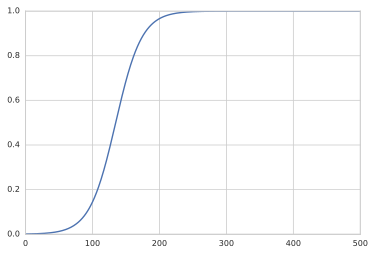

In [3]:
def haploid_trajectory(t, s, p):
    return p / (p + (1-s)**t * (1-p))

plt.plot([haploid_trajectory(x, 0.05, 0.001) for x in range(500)])
plt.show()

In [15]:
def generation_at_freq(s, freq):
    for g in range(1000):
        f = haploid_trajectory(g, s, 0.001)
        if f > freq:
            return g

for s in [0.02, 0.03, 0.04, 0.05, 0.1]:
    print(s, generation_at_freq(s, 0.99))

0.02 570
0.03 378
0.04 282
0.05 225
0.1 110


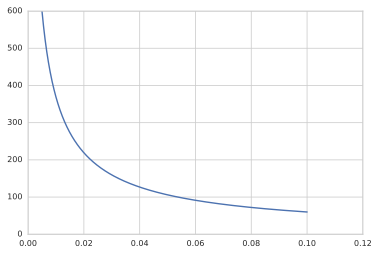

In [29]:
def fixation_time(s, N):
    return (1/s)*np.log(4*N*s) 
    
s_arr = np.linspace(0.005, 0.1, num=10000)
plt.plot(s_arr, fixation_time(s_arr, 1000))
plt.show()

In [27]:
for s, g in zip(s_arr, fixation_time(s_arr, 1000)):
    if g < 344:
        print(s, g)
        break

0.01100460046 343.911419944
